![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

In [877]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import mode

import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import mean_squared_error

In [878]:
#importing data
customer_df = pd.read_csv('C:/Users/aguva/Ironhack/Week_10/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [879]:
# Drop the column of Customer
customer_df = customer_df.drop(['Customer'], axis=1)

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [880]:
# Check the numerical variables
numerical_df = customer_df.select_dtypes(np.number)

In [881]:
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [882]:
# Select only th categorical columns

categorical_df = customer_df.select_dtypes(object)

In [883]:
categorical_df

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


2. Plot all the categorical variables with the proper plot. What can you see?

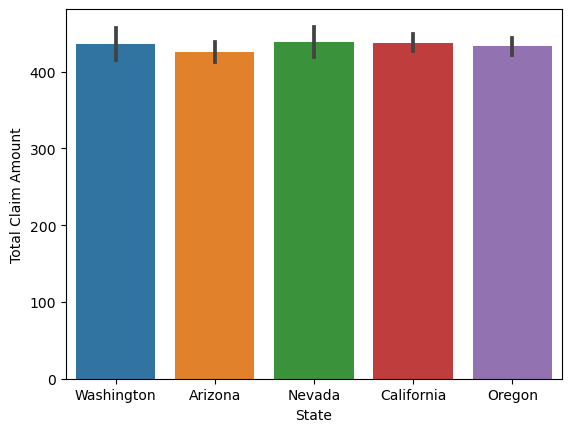

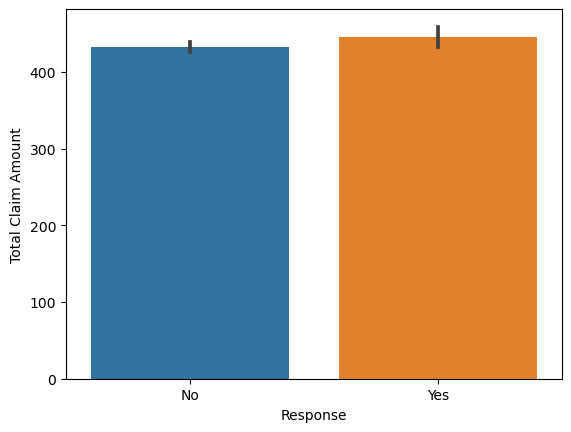

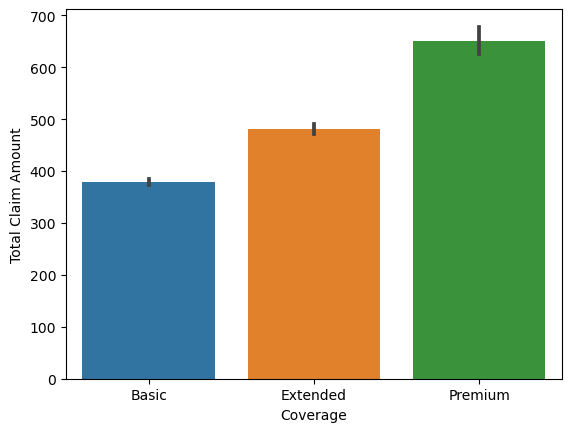

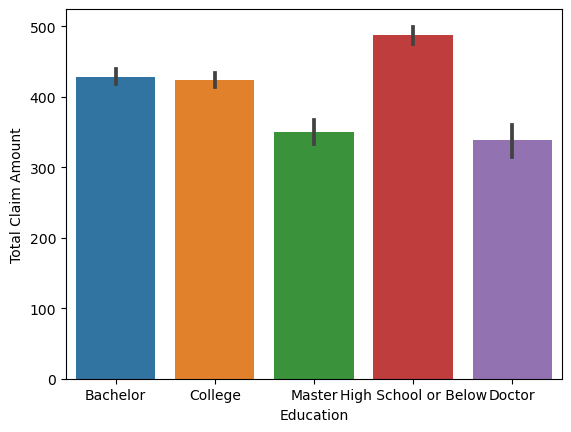

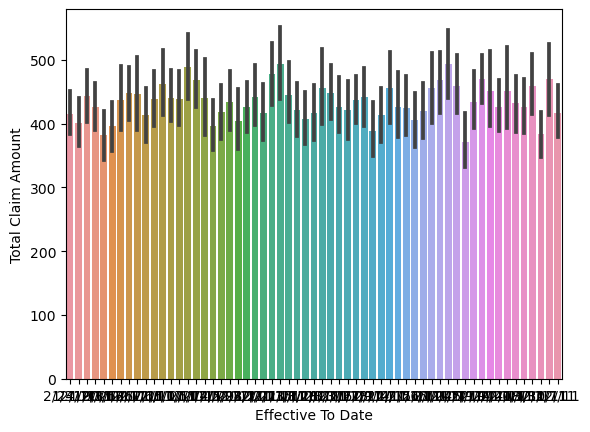

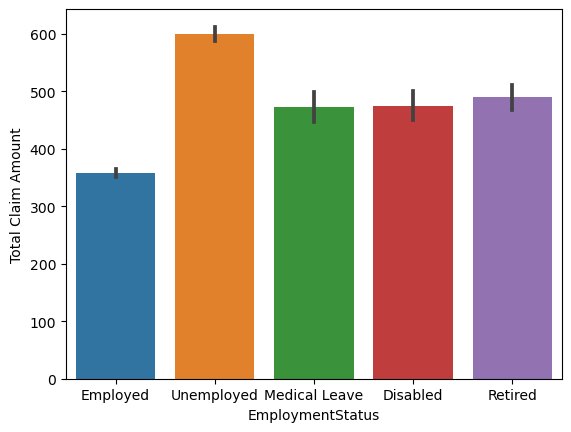

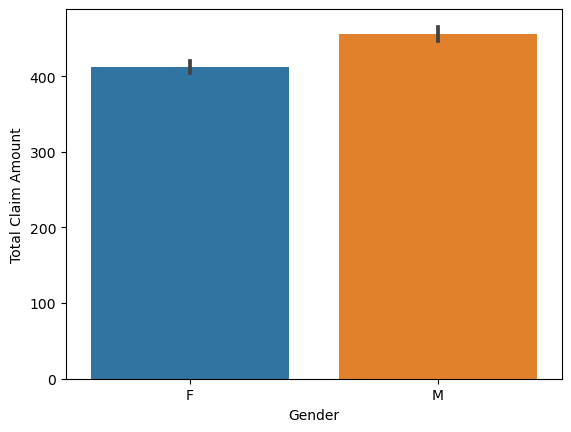

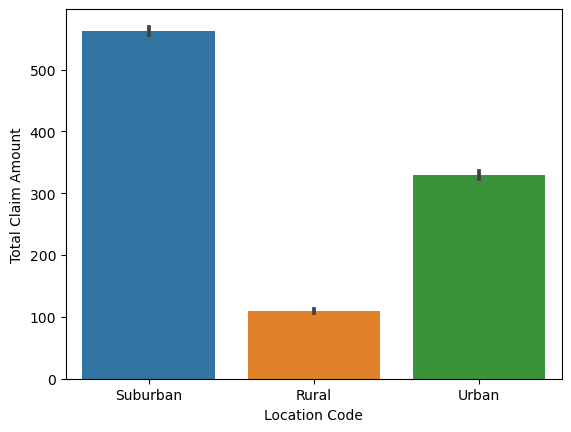

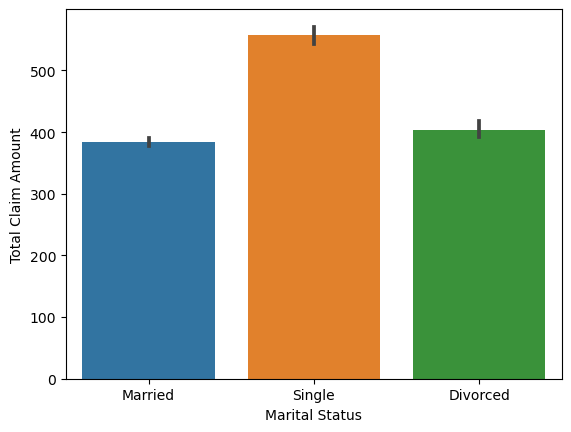

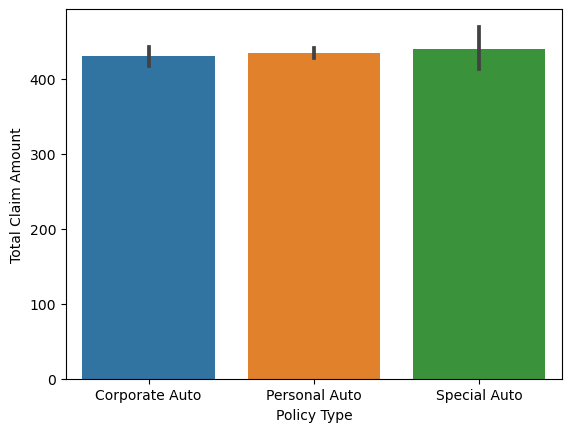

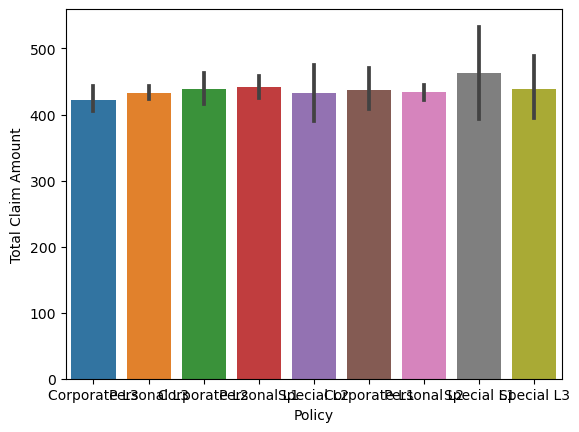

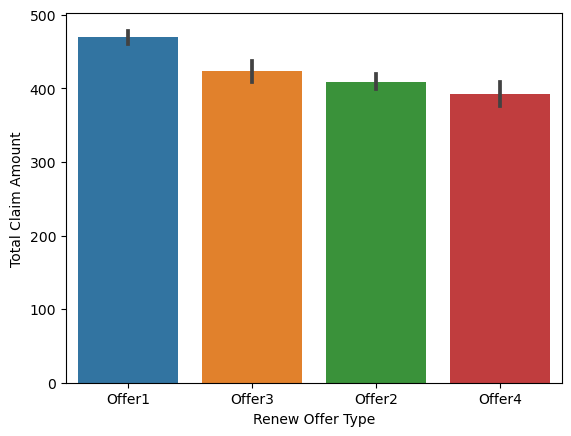

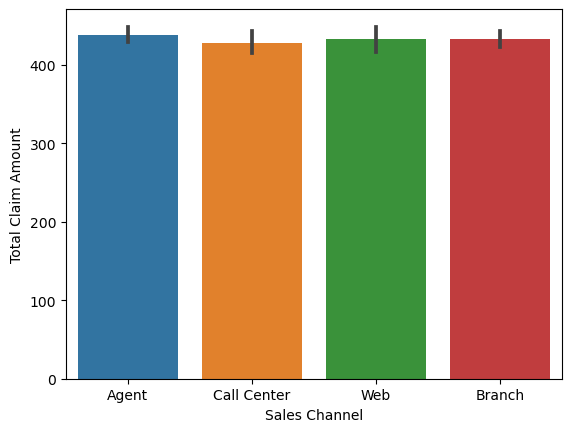

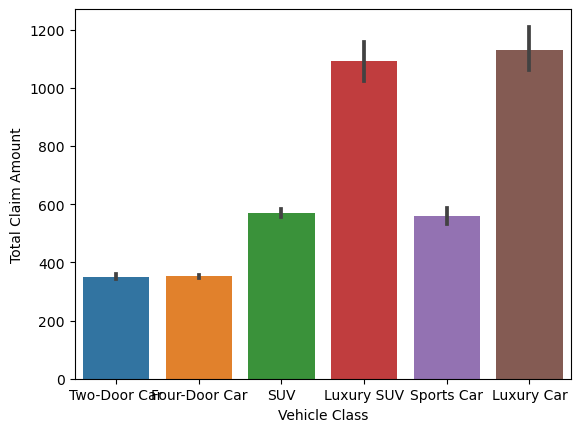

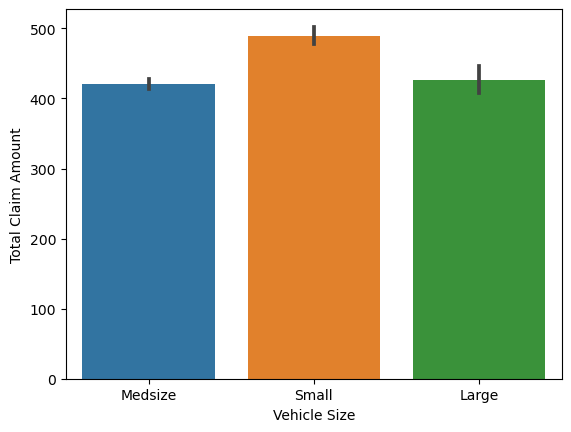

In [884]:
# Visually analyzing categorical data with Target variable

for column in categorical_df.columns:

    sns.barplot(x=categorical_df[column], y=customer_df['Total Claim Amount'], data=categorical_df)
    plt.show()

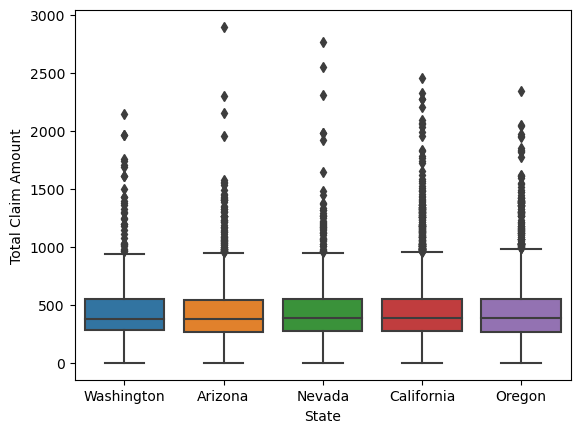

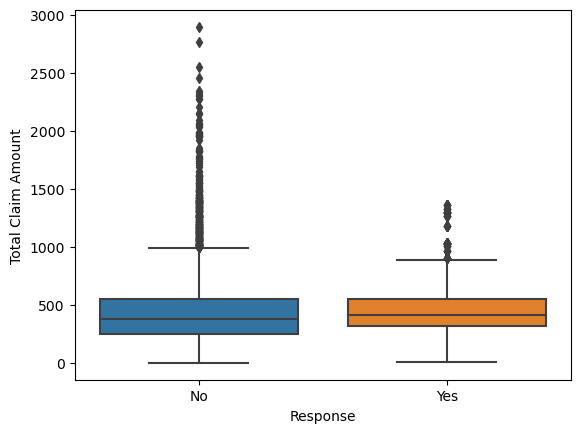

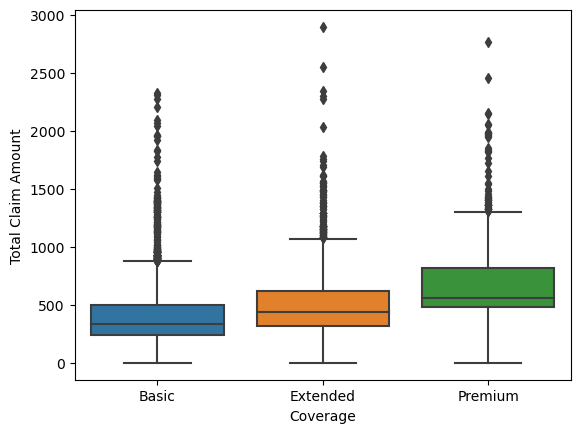

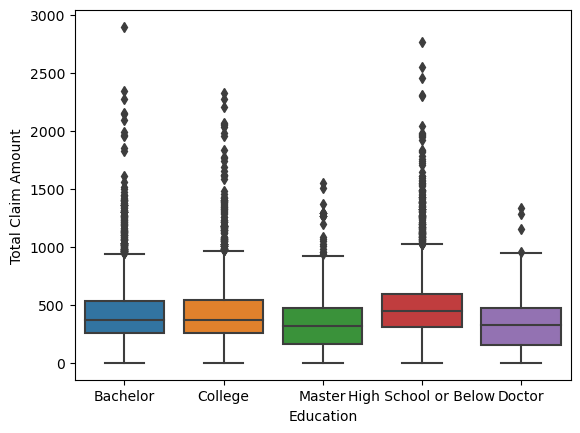

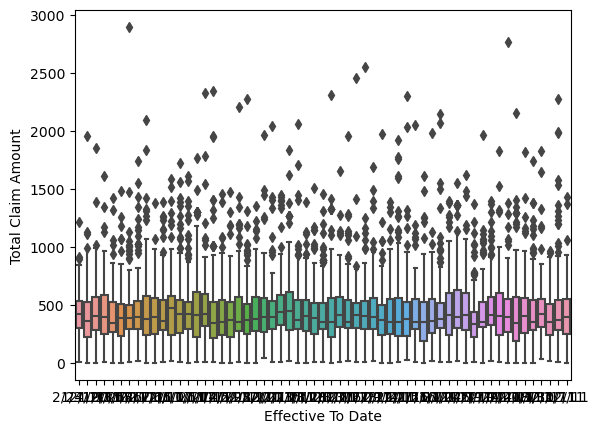

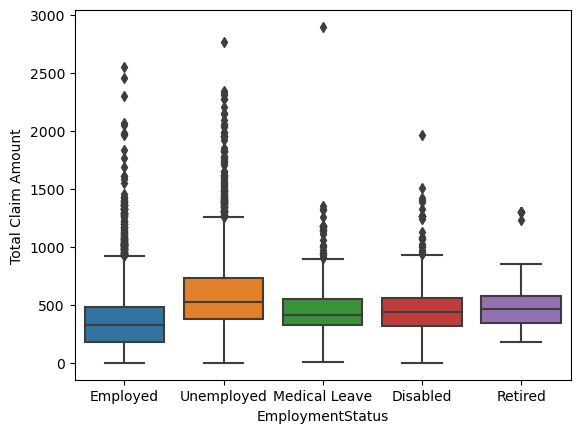

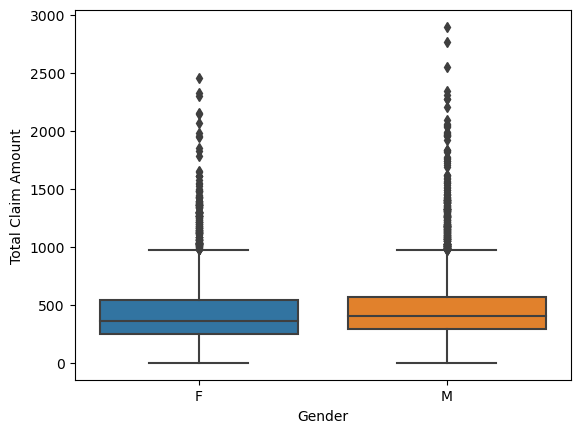

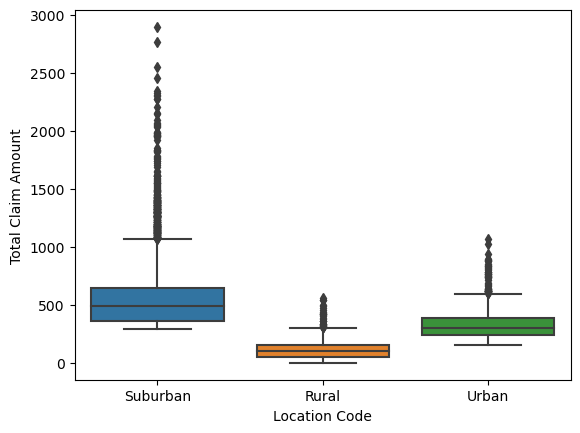

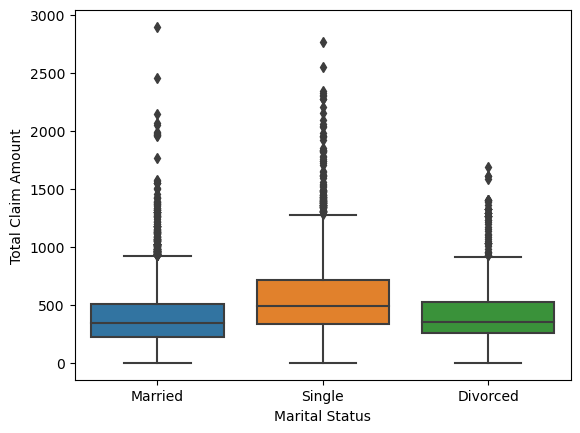

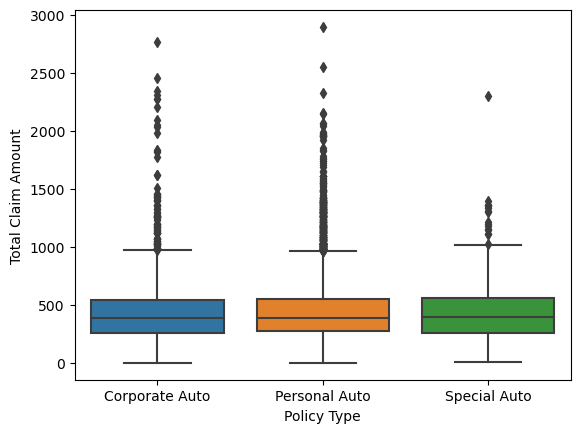

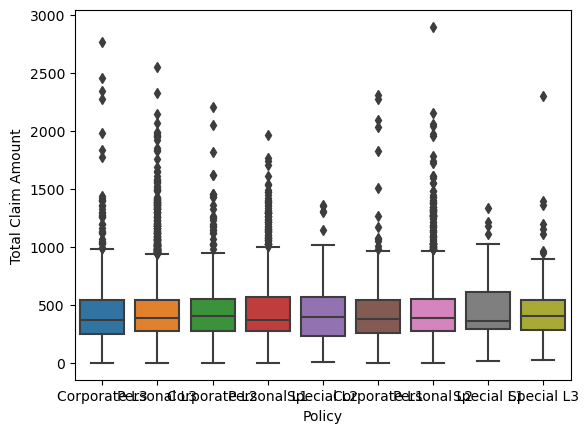

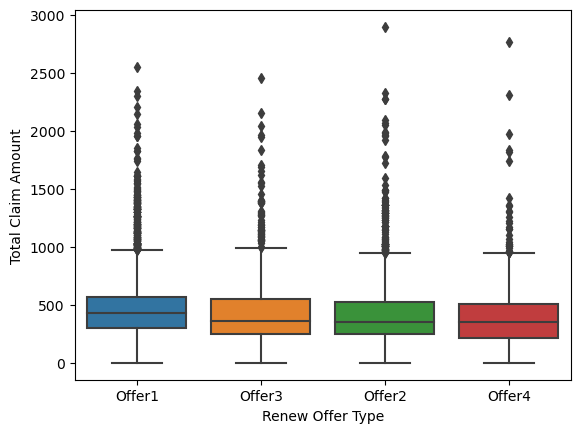

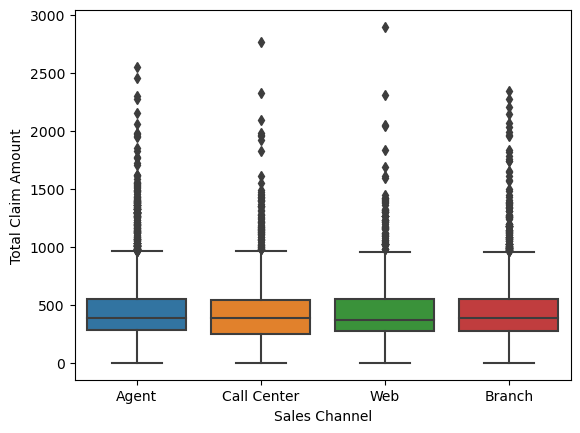

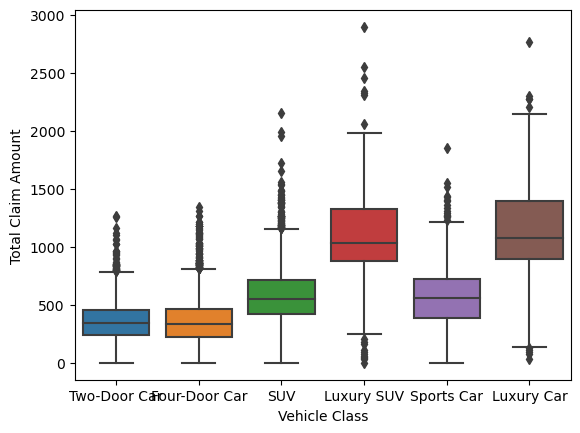

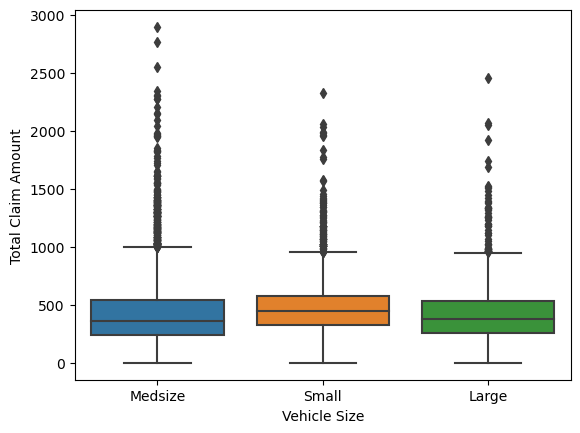

In [885]:
for column in categorical_df.columns:
    sns.boxplot(x=column, y=customer_df['Total Claim Amount'], data=categorical_df)
    plt.show()

### Conclusión:

Con el grafico de barra vemos la distribucion de las categorias

Veo que en su mayoria las variables categoricas se encuentras desbalanceadas, excepto para los caso:
 - Vehicule Size
 - Sales Channel
 - State
 - Policy Type
 - Gender

Tambien es importante destacar la cantidad de outlier que hay en cada una de las variables categoricas (entiendo al igual que en otros ejercicios fue considerada como Carible Objetivo 'Total Claim Amount')

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [886]:
# Checking for null values
nulls = pd.DataFrame(customer_df.isna().sum()/len(categorical_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,State,0.0
12,Months Since Last Claim,0.0
21,Vehicle Class,0.0
20,Total Claim Amount,0.0
19,Sales Channel,0.0
18,Renew Offer Type,0.0
17,Policy,0.0
16,Policy Type,0.0
15,Number of Policies,0.0
14,Number of Open Complaints,0.0


Consider redundante tener el tamaño del Vehicle Class si no tambien el Vehicle Size, considero que aporta mas valor Vehicle Class. Así como Channel y el Renew Offer Type, considero mas relevante el Sale Channel.

Eliminaria las siguientes categorias:

 - Effective To Date
 - Vehicle Size
 - Renew Offer Type
 - Policy
 - Location Code


Me quedaría con:
 - Customer Lifetime Value
 - Income
 - EmploymentStatus
 - State
 - Responde
 - Coverage
 - Eduaction
 - Gender
 - Marital Status
 - Vehicle Class
 - Months Since Policy Inception
 - Policy Type
 - Sales Channel

Considero estas variables como interesantes para la prediccion de la Variable Objetivo.

4. Plot time variable. Can you extract something from it?


In [887]:
customer_df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


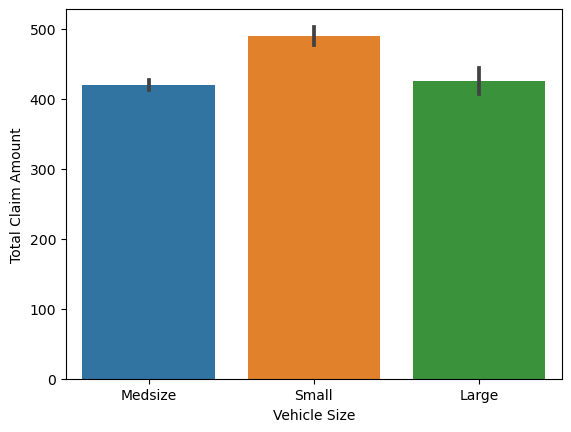

In [888]:
sns.barplot(x=categorical_df[column], y=customer_df['Total Claim Amount'], data=categorical_df)
plt.show()

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.




1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [889]:
# Aplico la función logartimica para dismunir la varianza de mi conjunto de dato, para luego aplicar nuevamente los Boxplot así tener un panorama más claro de la reperesentación de mi outliers.add()

customer_df2 = customer_df

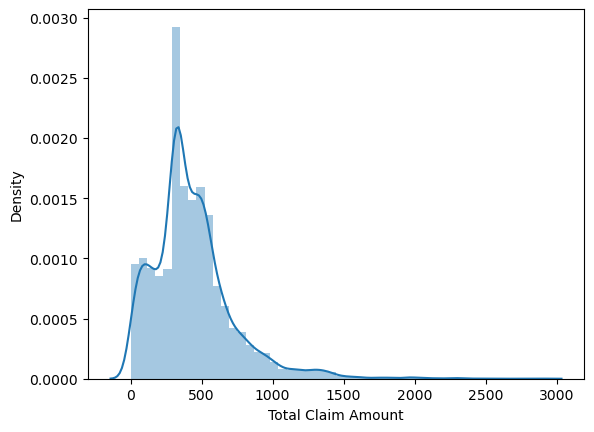

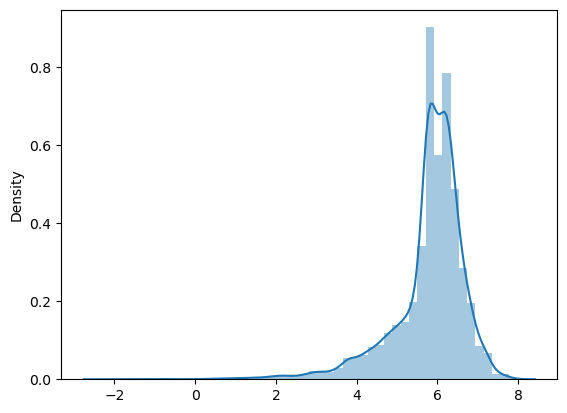

In [890]:
sns.distplot(customer_df2['Total Claim Amount'])
plt.show()

# Función logaritmica 
def log_transform_clean1(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

# Aplicamos la función
total_claim_amount_log = list(map(log_transform_clean1, customer_df2['Total Claim Amount']))
sns.distplot(total_claim_amount_log)
plt.show()

# Agregamos la columna al DataFrame y vemos el resultado

customer_df2['Total_Claim_Amount_Log'] = total_claim_amount_log

In [891]:
# Seleccionamos las columnas modificadas para compararlas
selected_columns = ['Total Claim Amount', 'Total_Claim_Amount_Log']
selected_df = customer_df2[selected_columns]
# Ordenammos por Total_Claim_Amount_Log
sorted_df = customer_df2[selected_columns].sort_values(by='Total_Claim_Amount_Log')
sorted_df

# Vemos que existen muchos reclamos cercanos a 0 por lo tanto voy a eliminar los casos donde el Total Claim Amount sea menor que 1.add()

customer_df2['Total Claim Amount'] = customer_df2['Total Claim Amount'].astype(int)


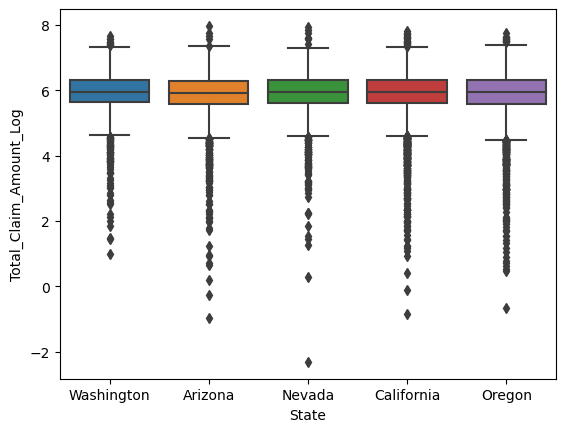

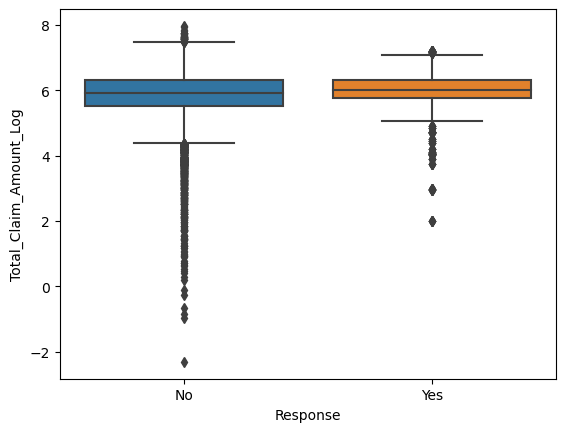

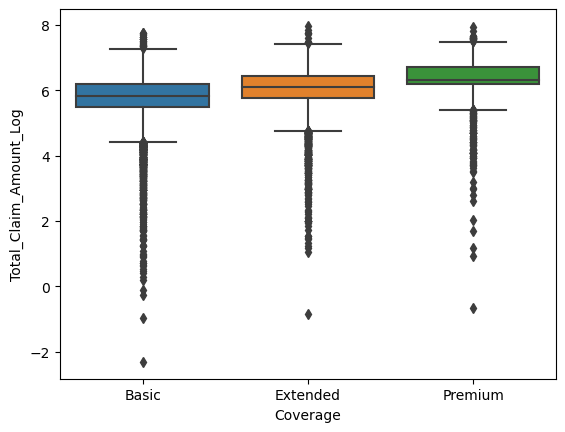

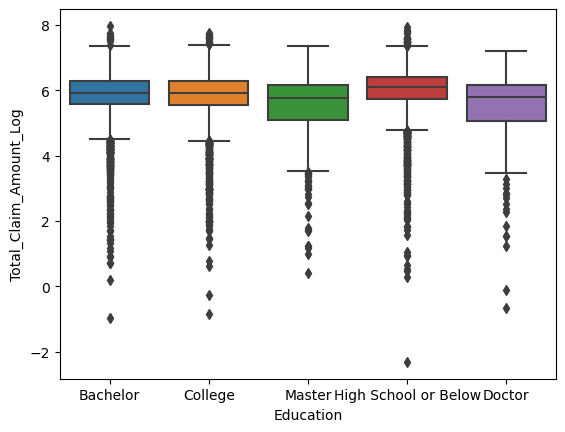

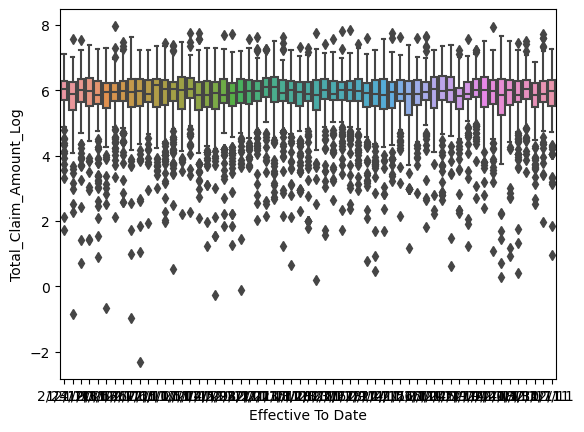

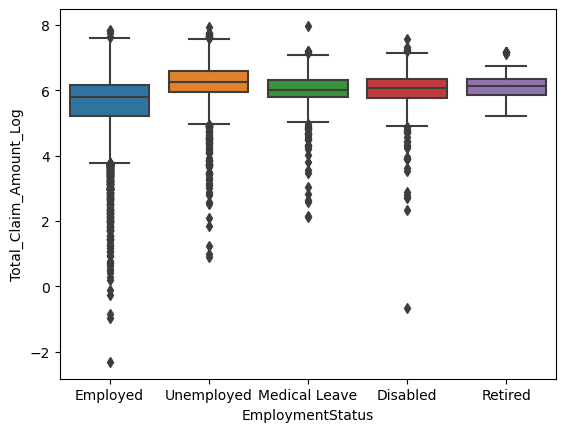

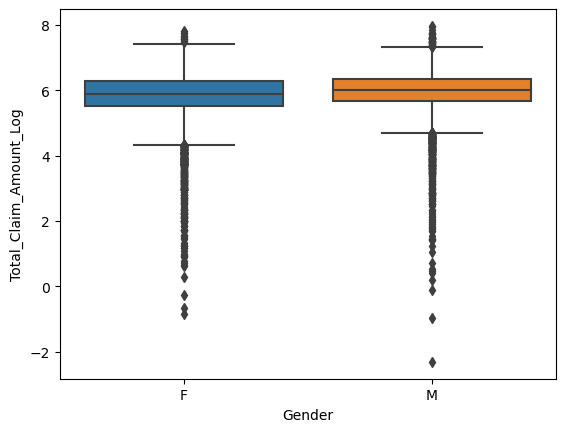

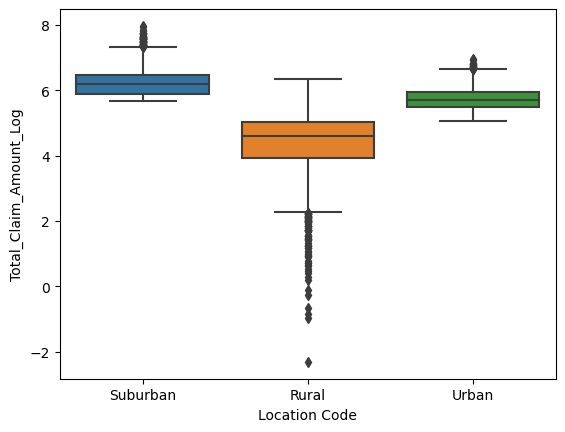

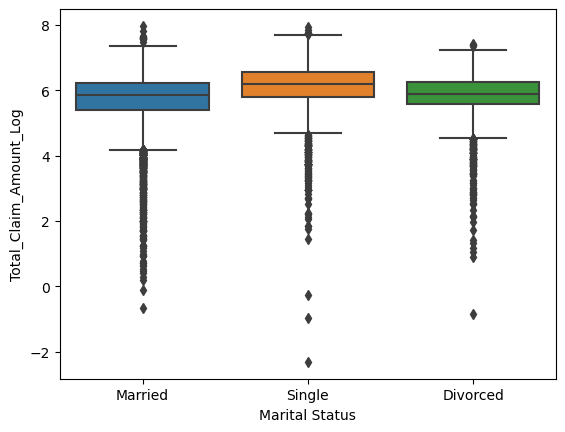

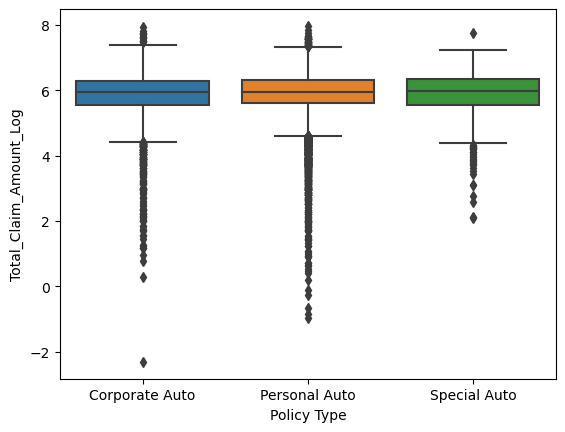

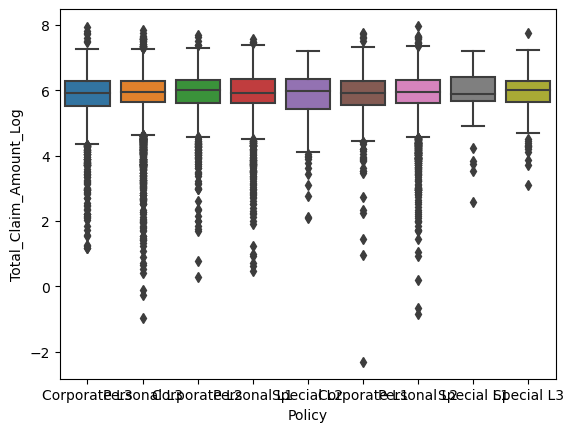

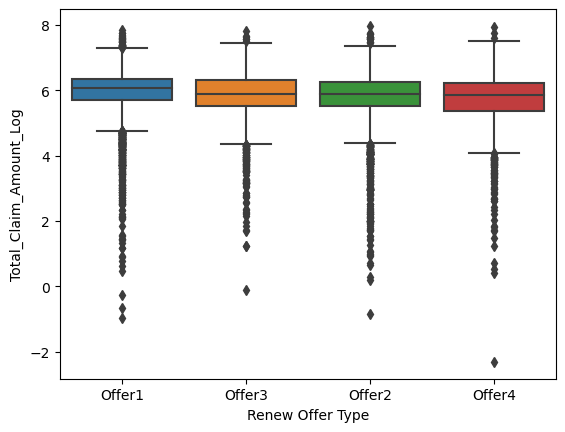

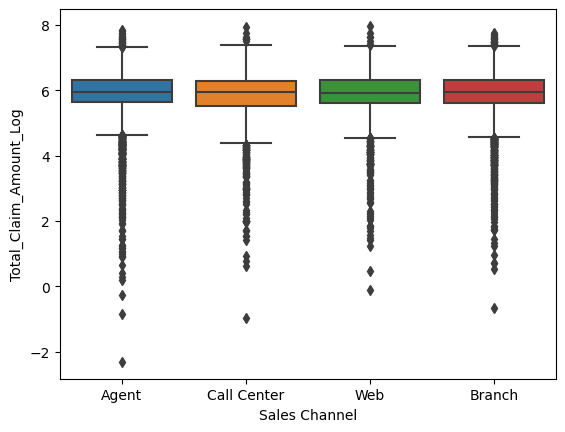

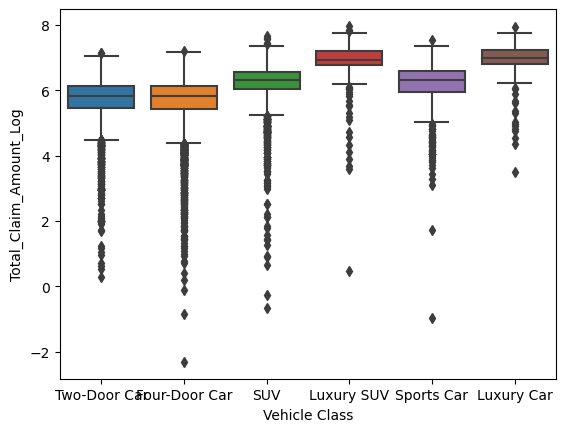

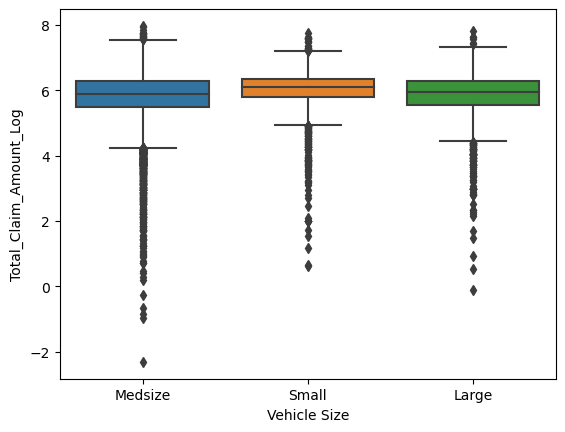

In [892]:
for column in categorical_df.columns:
    sns.boxplot(x=column, y=customer_df2['Total_Claim_Amount_Log'], data=customer_df2)
    plt.show()

In [893]:
customer_df2 = customer_df2[customer_df2['Total Claim Amount'] >= 1]


In [894]:
sorted_df = customer_df2[selected_columns].sort_values(by='Total_Claim_Amount_Log')
sorted_df

,Total Claim Amount,Total_Claim_Amount_Log
5197,1,0.189717
7725,1,0.286944
6159,1,0.398420
3881,1,0.462405
1328,1,0.523124
...,...,...
248,2345,7.760217
9049,2452,7.805024
4930,2552,7.844767
5074,2759,7.922911


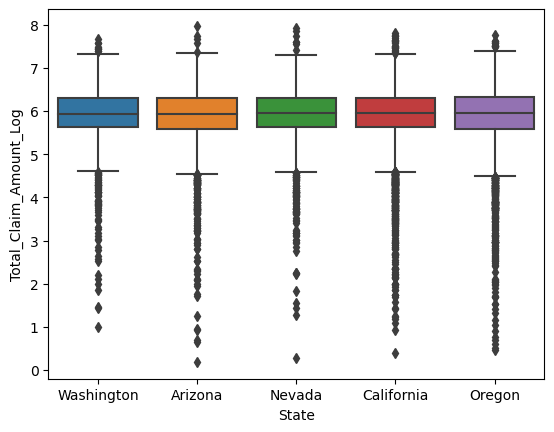

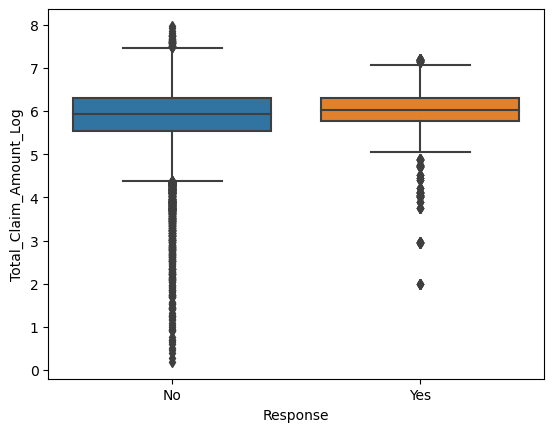

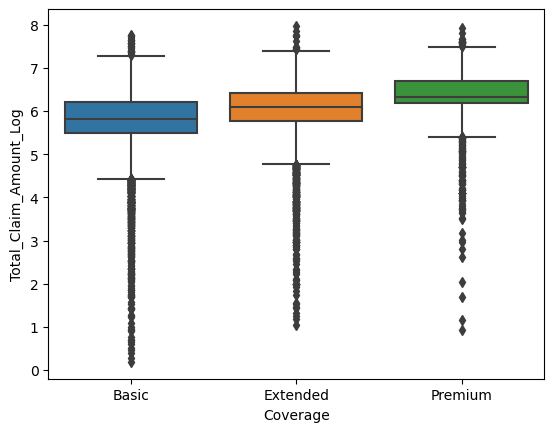

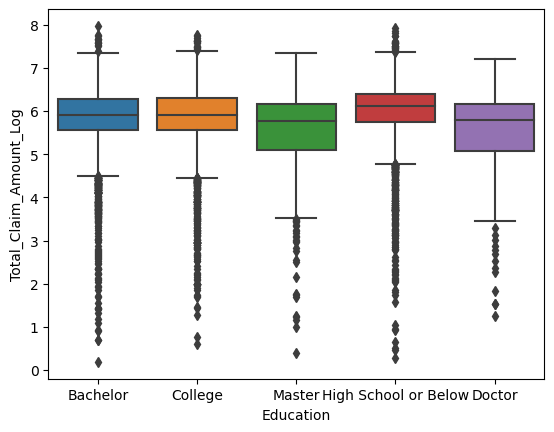

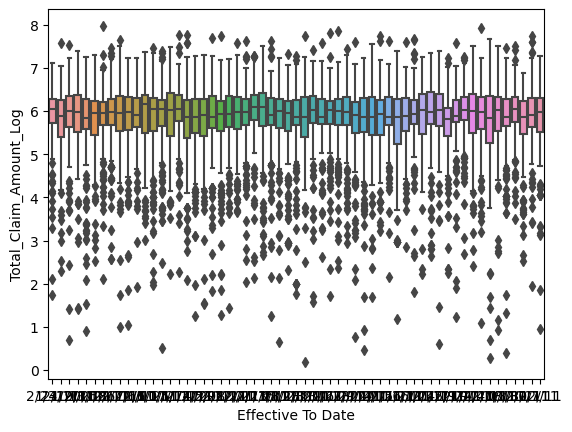

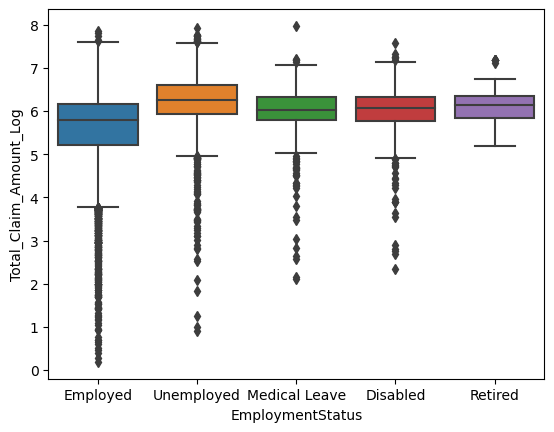

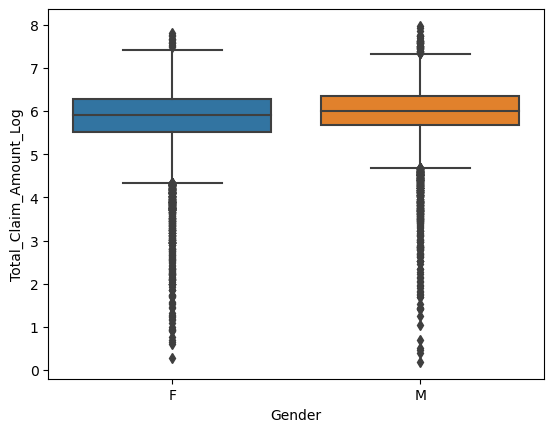

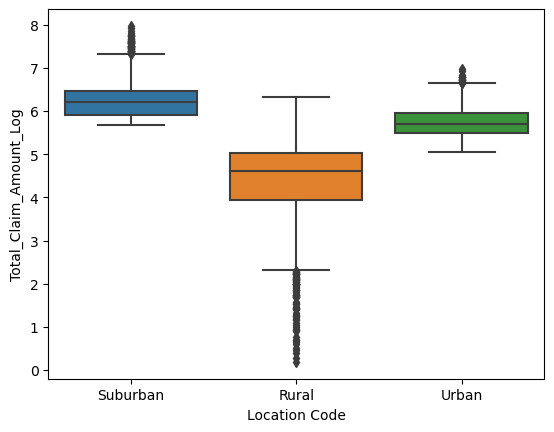

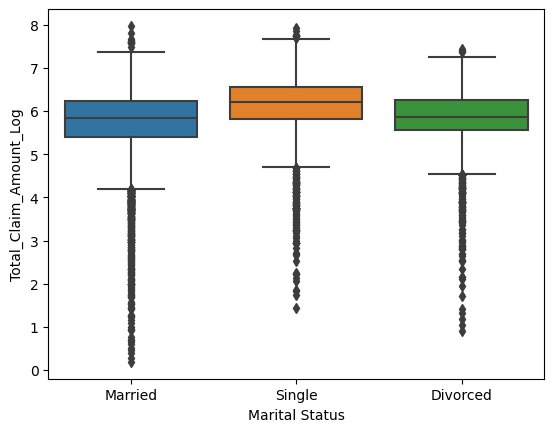

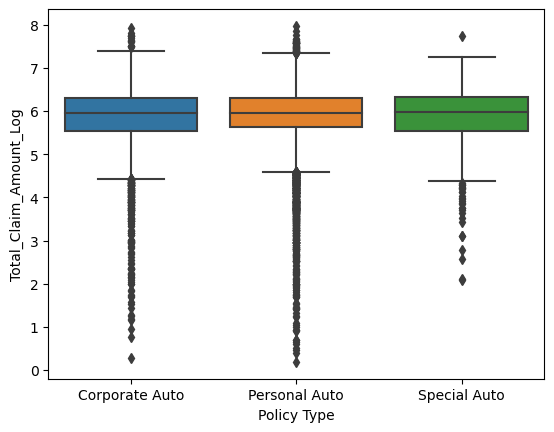

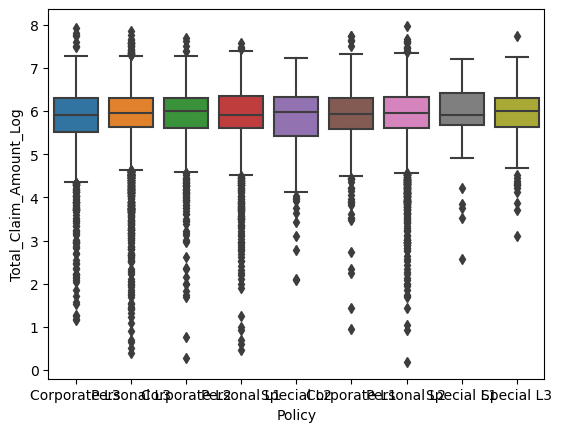

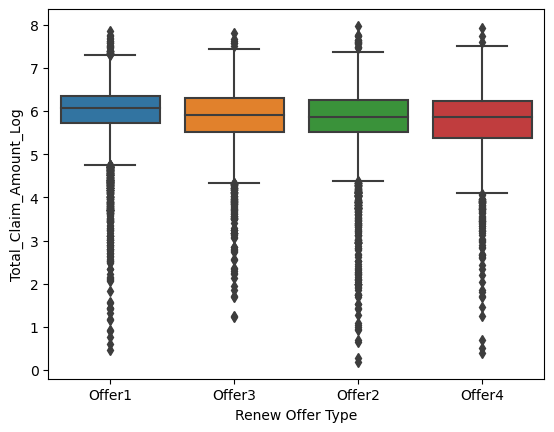

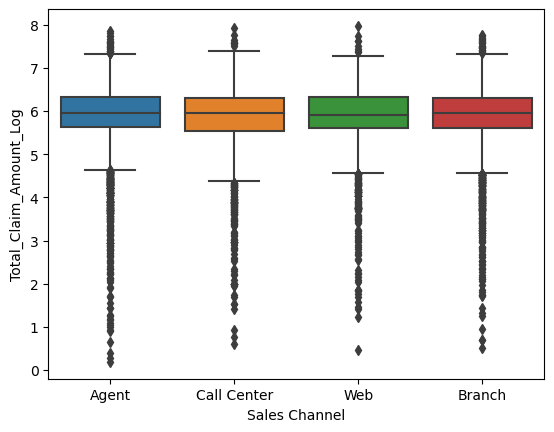

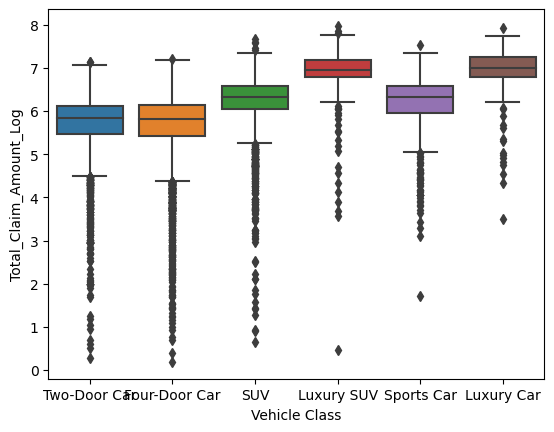

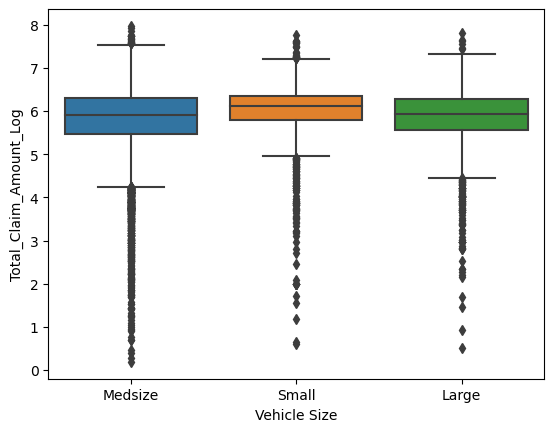

In [895]:
for column in categorical_df.columns:
    sns.boxplot(x=column, y=customer_df2['Total_Claim_Amount_Log'], data=customer_df2)
    plt.show()

In [896]:
#El haber aplicado logaritmo no mejoró el tratamiento de los outliers, aumentaros.

In [897]:
# Calcular los límites superior e inferior para identificar los outliers
Q1 = customer_df2['Total Claim Amount'].quantile(0.25)
Q3 = customer_df2['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

# Contar los outliers en la columna "Total Claim Amount"
outliers_count = len(customer_df2[(customer_df2['Total Claim Amount'] < lower_bound1) | (customer_df2['Total Claim Amount'] > upper_bound1)])

# Imprimir el número de outliers
print("Número de outliers:", outliers_count)

Número de outliers: 453


In [898]:
# Calcular los límites superior e inferior para identificar los outliers
Q1 = customer_df2['Total_Claim_Amount_Log'].quantile(0.25)
Q3 = customer_df2['Total_Claim_Amount_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los outliers en la columna "Total Claim Amount"
outliers_count = len(customer_df2[(customer_df2['Total_Claim_Amount_Log'] < lower_bound) | (customer_df2['Total_Claim_Amount_Log'] > upper_bound)])

# Imprimir el número de outliers
print("Número de outliers:", outliers_count, lower_bound, upper_bound)

Número de outliers: 897 4.5617943892360255 7.352819764429659


In [899]:
# Como la cantidad de outliers un muy baja elimino los valores superiores al 0.75 e inferiores a 0.25

customer_df2 = customer_df2.drop(customer_df2[(customer_df2['Total Claim Amount'] < lower_bound1) | (customer_df2['Total Claim Amount'] > upper_bound1)].index)

customer_df2.shape


(8675, 24)

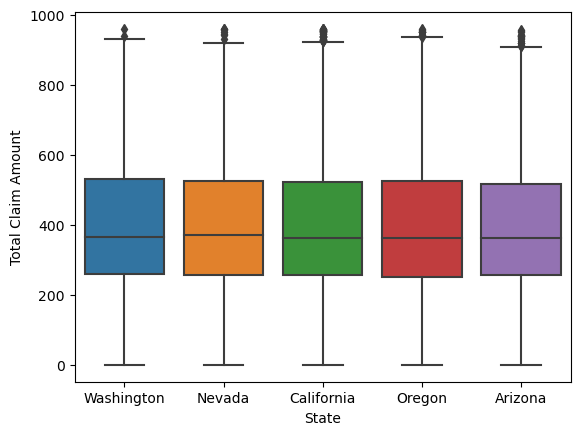

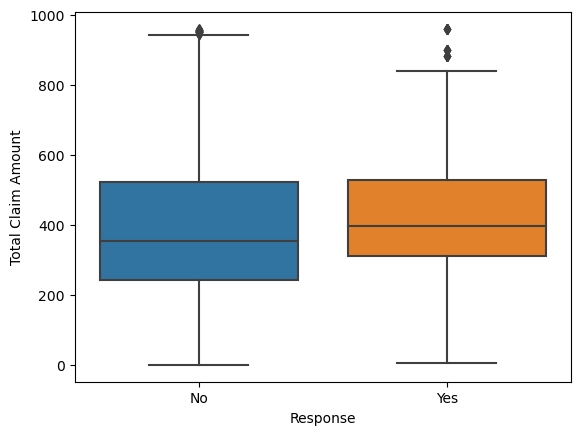

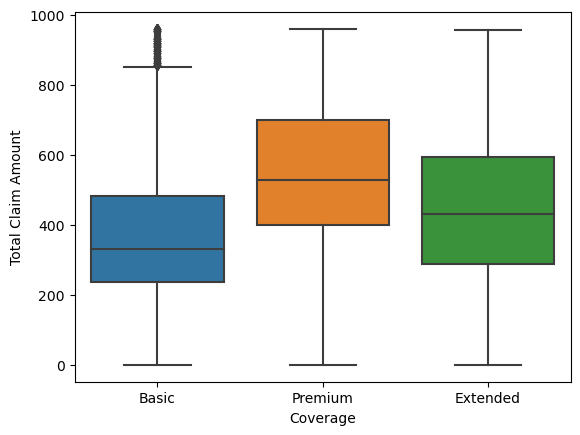

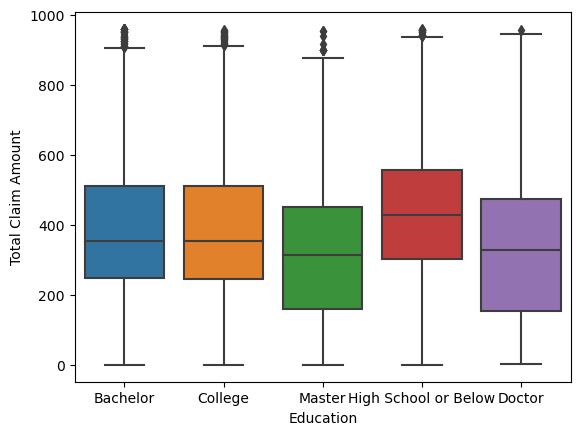

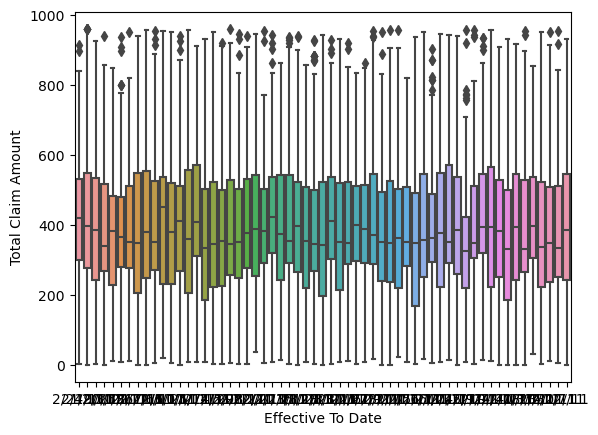

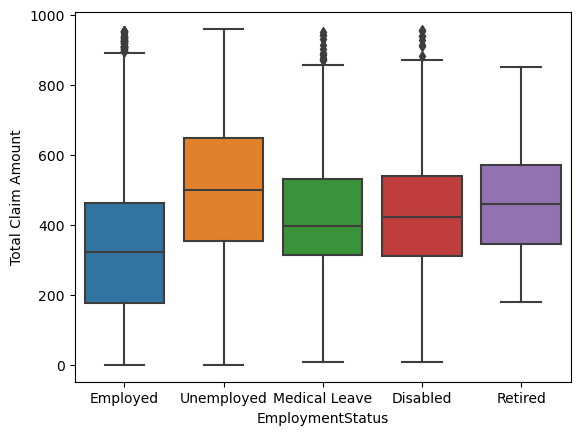

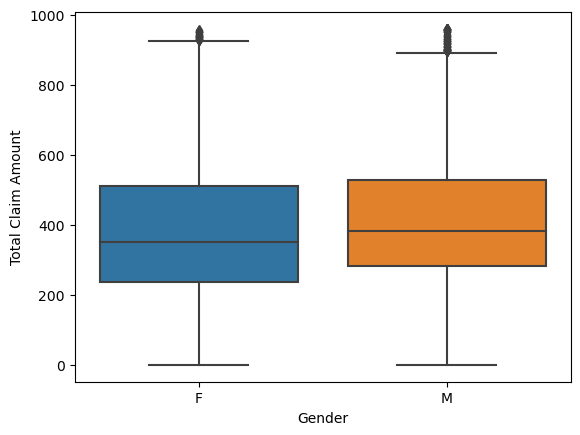

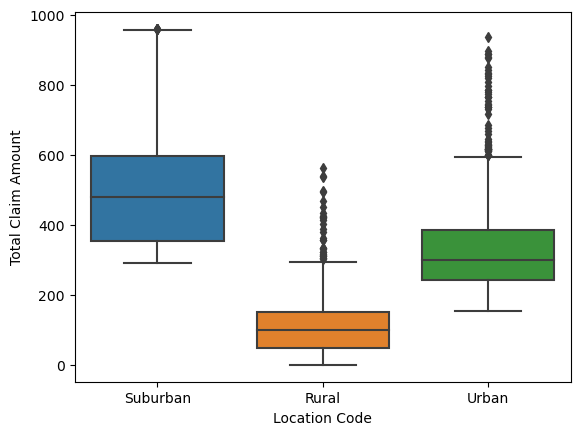

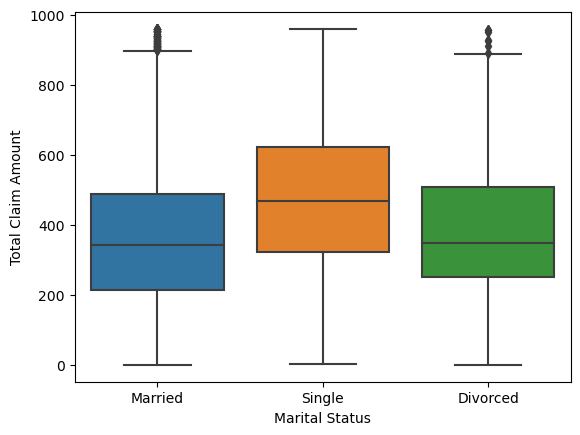

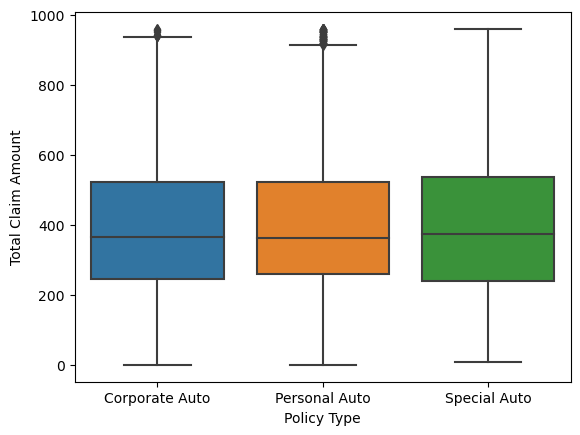

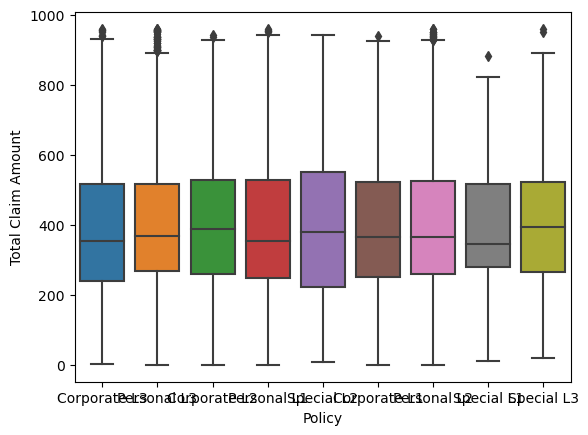

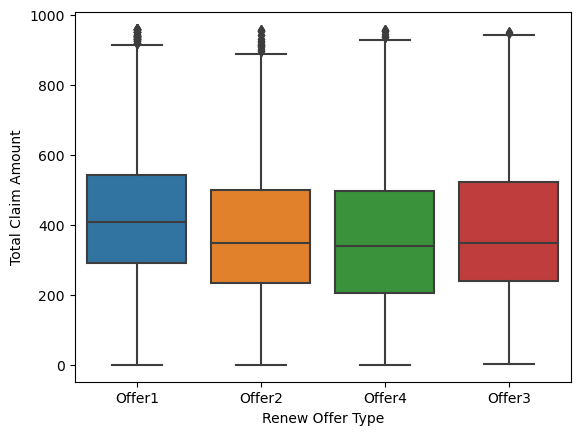

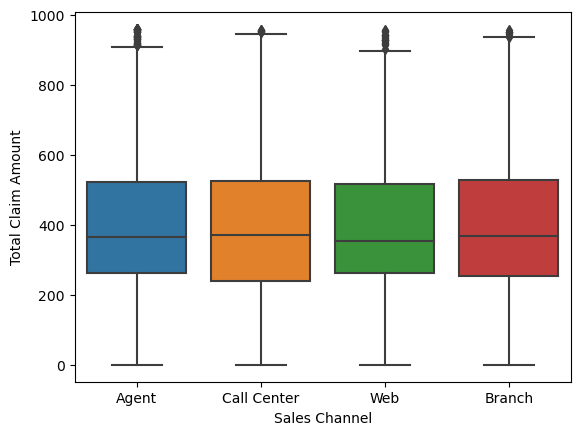

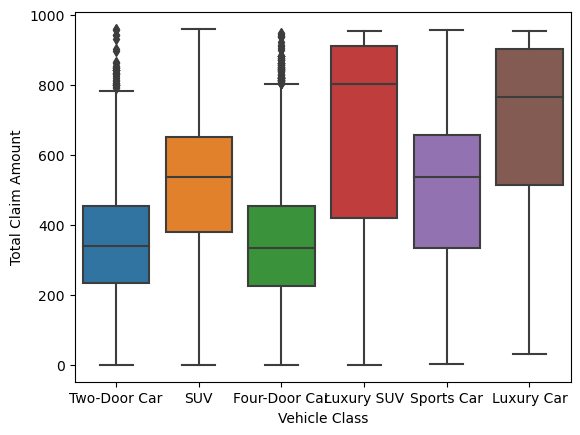

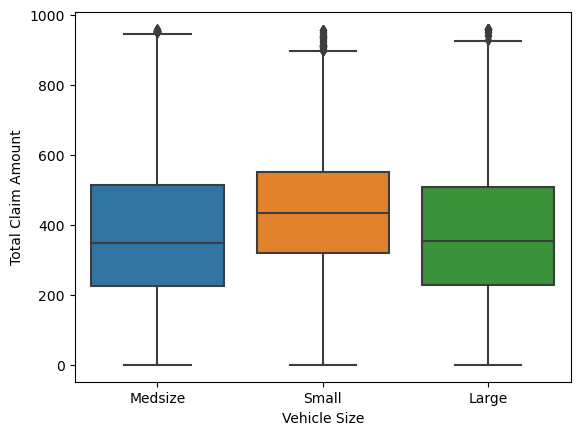

In [900]:
for column in categorical_df.columns:
    sns.boxplot(x=column, y=customer_df2['Total Claim Amount'], data=customer_df2)
    plt.show()
    
# Ahora existen menor cantidad de outliers


In [901]:
# Outliers con Total Claim Amount

# Calculo de los limites inferiores y superiores
Q1 = customer_df2['Total Claim Amount'].quantile(0.25)
Q3 = customer_df2['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los outliers
outliers_count = len(customer_df2[(customer_df2['Total Claim Amount'] < lower_bound) | (customer_df2['Total Claim Amount'] > upper_bound)])

# Numero de outliers
print("Número de outliers:", outliers_count)

Número de outliers: 79


2. Create a copy of the dataframe for the data wrangling.

In [902]:
df_copy = customer_df2.copy()
customer_df2.shape

(8675, 24)

In [903]:
df_copy.info



<bound method DataFrame.info of            State  Customer Lifetime Value Response  Coverage Education  \
0     Washington              2763.519279       No     Basic  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
5         Oregon              8256.297800      Yes     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0 

5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [904]:
# Eliminamos la columna Total_Claim_Amount_Log

df_copy.drop(['Total_Claim_Amount_Log'], axis=1, inplace=True)

In [905]:
# Extraemos la informacion de la variable tiempo

# Convertimos en DataTime
df_copy['Effective To Date'] = pd.to_datetime(df_copy['Effective To Date'])  

df_copy['day_of_week'] = df_copy['Effective To Date'].dt.dayofweek  # Extraemos día (L:0 D:6)
df_copy['month'] = df_copy['Effective To Date'].dt.month  # Extraemos mes (de 1 a 12)
# Elimino la columa 'Effective to date'
df_copy.drop(['Effective To Date'], axis=1, inplace=True)

df_copy.info


<bound method DataFrame.info of            State  Customer Lifetime Value Response  Coverage Education  \
0     Washington              2763.519279       No     Basic  Bachelor   
2         Nevada             12887.431650       No   Premium  Bachelor   
3     California              7645.861827       No     Basic  Bachelor   
4     Washington              2813.692575       No     Basic  Bachelor   
5         Oregon              8256.297800      Yes     Basic  Bachelor   
...          ...                      ...      ...       ...       ...   
9129  California             23405.987980       No     Basic  Bachelor   
9130  California              3096.511217      Yes  Extended   College   
9131  California              8163.890428       No  Extended  Bachelor   
9132  California              7524.442436       No  Extended   College   
9133  California              2611.836866       No  Extended   College   

     EmploymentStatus Gender  Income Location Code Marital Status  ...  \
0    

3. Normalize the continuous variables. You can use any one method you want.


**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```

In [906]:
# Modificamos las siguientes columnas con el consejo propuesto

    # Ordinal to coverage
df_copy["Coverage"] = df_copy["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

    # Ordinal to employmentstatus
    
df_copy["EmploymentStatus"] = df_copy["EmploymentStatus"].map({"Unemployed" : 0, "Employed" : 1})

    # Ordinal to location code
    
df_copy["Location Code"] = df_copy["Location Code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})

    # Ordinal vehicle size
    
df_copy["Vehicle Size"] = df_copy["Location Code"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


In [907]:
#Seleccionamos los datos numericos

df_num = df_copy.select_dtypes(include=np.number)

#Normalimos

transformer=StandardScaler().fit(df_num)
df_2_norm= transformer.transform(df_num)
print(df_2_norm.shape)
df_2_norm= pd.DataFrame(df_2_norm)

(8675, 14)


4. Encode the categorical variables

In [908]:
df_categorical = df_copy.select_dtypes(include="object")
df_categorical
df_categorical.shape

(8675, 10)

In [909]:
# Según la consigna propuesta doy por entendido que las siguientes columnas no se incorporan al modelo.
    # Responde 
    # Education
    # Gender
    # Policy Type
    # Ordinal to coverage

df_categorical.drop(['Response'], axis=1, inplace=True)
df_categorical.drop(['Education'], axis=1, inplace=True)
df_categorical.drop(['Gender'], axis=1, inplace=True)
df_categorical.drop(['Policy Type'], axis=1, inplace=True)


for x in df_categorical.columns:
    value= df_categorical.value_counts([x])
    print(x, value)


State State     
California    2976
Oregon        2473
Arizona       1627
Nevada         835
Washington     764
dtype: int64
Marital Status Marital Status
Married           5150
Single            2210
Divorced          1315
dtype: int64
Policy Policy      
Personal L3     3252
Personal L2     2020
Personal L1     1164
Corporate L3     972
Corporate L2     565
Corporate L1     343
Special L2       157
Special L3       142
Special L1        60
dtype: int64
Renew Offer Type Renew Offer Type
Offer1              3508
Offer2              2809
Offer3              1364
Offer4               994
dtype: int64
Sales Channel Sales Channel
Agent            3289
Branch           2441
Call Center      1692
Web              1253
dtype: int64
Vehicle Class Vehicle Class
Four-Door Car    4572
Two-Door Car     1876
SUV              1647
Sports Car        445
Luxury SUV         72
Luxury Car         63
dtype: int64


In [913]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             8675 non-null   object
 1   Marital Status    8675 non-null   object
 2   Policy            8675 non-null   object
 3   Renew Offer Type  8675 non-null   object
 4   Sales Channel     8675 non-null   object
 5   Vehicle Class     8675 non-null   object
dtypes: object(6)
memory usage: 474.4+ KB


In [914]:
#para sacar dummies vamos a usar la liberería OneHotEncoder

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop="first")

# Ajustar y transformar el dataframe categórico
encoded = encoder.fit_transform(df_categorical).toarray()

# Crear un nuevo dataframe con las columnas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df_categorical.columns))

encoded_df.shape


(8675, 25)

6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [918]:
# Concateno los dataframes horizontalmente 
concatenated_df = pd.concat([df_2_norm, encoded_df], axis=1)

# Pedimos .info()
concatenated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   0                           8675 non-null   float64
 1   1                           8675 non-null   float64
 2   2                           7609 non-null   float64
 3   3                           8675 non-null   float64
 4   4                           8675 non-null   float64
 5   5                           8675 non-null   float64
 6   6                           8675 non-null   float64
 7   7                           8675 non-null   float64
 8   8                           8675 non-null   float64
 9   9                           8675 non-null   float64
 10  10                          8675 non-null   float64
 11  11                          0 non-null      float64
 12  12                          8675 non-null   float64
 13  13                          8675 

Todos los valores son númericos